In [1]:
# 패키지 불러오기 및 데이터 불러오기

import numpy as np
import pandas as pd
df_per = pd.read_excel('per.xlsx')

In [2]:
df_per.set_index('Date', inplace = True)

In [3]:
df_per.index

DatetimeIndex(['2001-01-31', '2001-02-28', '2001-03-30', '2001-04-30',
               '2001-05-31', '2001-06-29', '2001-07-31', '2001-08-31',
               '2001-09-28', '2001-10-31',
               ...
               '2018-08-31', '2018-09-28', '2018-10-31', '2018-11-30',
               '2018-12-31', '2019-01-31', '2019-02-28', '2019-03-29',
               '2019-04-30', '2019-05-29'],
              dtype='datetime64[ns]', name='Date', length=221, freq=None)

In [6]:
rebalancing_schedule = df_per[1::3].index

In [5]:
rebalancing_schedule

DatetimeIndex(['2001-02-28', '2001-05-31', '2001-08-31', '2001-11-30',
               '2002-02-28', '2002-05-31', '2002-08-30', '2002-11-29',
               '2003-02-28', '2003-05-30', '2003-08-29', '2003-11-28',
               '2004-02-27', '2004-05-31', '2004-08-31', '2004-11-30',
               '2005-02-28', '2005-05-31', '2005-08-31', '2005-11-30',
               '2006-02-28', '2006-05-31', '2006-08-31', '2006-11-30',
               '2007-02-28', '2007-05-31', '2007-08-31', '2007-11-30',
               '2008-02-29', '2008-05-30', '2008-08-29', '2008-11-28',
               '2009-02-27', '2009-05-29', '2009-08-31', '2009-11-30',
               '2010-02-26', '2010-05-31', '2010-08-31', '2010-11-30',
               '2011-02-28', '2011-05-31', '2011-08-31', '2011-11-30',
               '2012-02-29', '2012-05-31', '2012-08-31', '2012-11-30',
               '2013-02-28', '2013-05-31', '2013-08-30', '2013-11-29',
               '2014-02-28', '2014-05-30', '2014-08-29', '2014-11-28',
      

In [9]:
df_k200 = pd.read_excel('K200.xlsx', index_col = 0)

In [10]:
df_k200.head()

,A000010,A000020,A000030,A000040,A000050,A000060,A000070,A000080,A000090,A000100,...,A300720,A306200,A307950,A316140,A900030,A900050,A900140,A950010,A950070,A950100
1999-01-29,1,1,1,0,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1999-02-26,1,1,1,0,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1999-03-31,1,1,1,0,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1999-04-30,1,1,1,0,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1999-05-31,1,1,1,0,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [13]:
rebal_date = rebalancing_schedule[0]  # 리밸런싱 첫번째 날짜

k200 = df_k200.loc[rebal_date, :]  # 전체 유니버스의 리밸런싱 첫번째 날짜의 코스피200 포함여부 데이터로 slicing
k200 = k200[k200 == 1].index.values  # 값이 1 (코스피200 지수 포함) 인 종목코드만 따로 저장 

per_i = df_per.loc[rebal_date, k200]  # 코스피200에 포함되어 있으면서, 리밸런싱 첫번째 날짜에 해당하는 PER 데이터를 slicing
per_i = per_i[per_i>=0]  # PER이 음수인 경우는 실적이 음수라는 말이기 때문에 성격에 맞지 않으므로 제외
per_i = per_i.dropna()  # 데이터가 없는 종목 제외
per_i = per_i.astype(float)  
low30 = per_i.nsmallest(30).index.values  # 값이 작은 30개 종목들로 압축하여 low30으로 저장

In [12]:
low30

array(['A000700', 'A001440', 'A025830', 'A011200', 'A003030', 'A030210',
       'A006360', 'A005950', 'A025000', 'A002300', 'A020000', 'A001740',
       'A003300', 'A001800', 'A017300', 'A009720', 'A012630', 'A006260',
       'A010620', 'A012330', 'A012200', 'A000150', 'A000210', 'A025850',
       'A001680', 'A004150', 'A009280', 'A007310', 'A018880', 'A001300'],
      dtype=object)

In [16]:
rebalData_all = []

for i in range(len(rebalancing_schedule)):
    
    rebal_date = rebalancing_schedule[i]
    k200 = df_k200.loc[rebal_date, :] 
    k200 = k200[k200 == 1].index.values
    
    per_ith = df_per.loc[rebal_date, k200]
    per_ith = per_ith[per_ith>=0]
    per_ith = per_ith.dropna()
    per_ith = per_ith.astype(float)
    low30 = per_ith.nsmallest(30).index.values
    
    df_code = pd.DataFrame(low30, columns = ['code'])
    df_code['date'] = rebal_date
    df_code['weight'] = np.ones(len(df_code)) / len(df_code)
    df_code = df_code[['date', 'code', 'weight']]
    
    rebalData_all.append(df_code)
    
rebalData_all = pd.concat(rebalData_all, ignore_index =True)

In [17]:
rebalData_all

,date,code,weight
0,2001-02-28,A000700,0.033333
1,2001-02-28,A001440,0.033333
2,2001-02-28,A025830,0.033333
3,2001-02-28,A011200,0.033333
4,2001-02-28,A003030,0.033333
...,...,...,...
2215,2019-05-29,A011170,0.033333
2216,2019-05-29,A001450,0.033333
2217,2019-05-29,A003550,0.033333
2218,2019-05-29,A071050,0.033333


In [20]:
priceData = pd.read_excel('price.xlsx', index_col = 0)

In [21]:
priceData

,A000010,A000020,A000030,A000040,A000050,A000060,A000070,A000080,A000090,A000100,...,A300720,A306200,A307950,A316140,A900030,A900050,A900140,A950010,A950070,A950100
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-31,3195.0,2720,2915.0,9890,1752,875,13717,4050.0,NaN,15181,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-02-29,2360.0,2814,2000.0,8991,1781,743,16310,4050.0,NaN,18046,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-03-31,2005.0,2973,1730.0,9590,2127,680,13285,3430.0,NaN,17091,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-04-28,2040.0,2215,1685.0,9290,1856,451,14257,3000.0,NaN,14527,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-05-31,2605.0,1751,1895.0,7417,1687,468,10531,3100.0,NaN,14980,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-31,NaN,9840,14800.0,528,11000,22200,83200,16900.0,NaN,238000,...,142000.0,66900.0,NaN,NaN,NaN,NaN,2715.0,NaN,NaN,NaN
2019-02-28,NaN,9800,NaN,507,11250,22100,84300,17700.0,NaN,260500,...,143000.0,64500.0,NaN,14800.0,NaN,NaN,2820.0,NaN,NaN,NaN
2019-03-29,NaN,9400,NaN,493,10050,24300,82500,18500.0,NaN,240000,...,144500.0,62200.0,82100.0,13750.0,NaN,NaN,2565.0,NaN,NaN,NaN


In [27]:
rebal_price = priceData.loc[rebalancing_schedule,:]  # 주가 데이터에서 리밸련싱 날짜에 해당하는 값만 추출
df_return = rebal_price.pct_change()  # 수익률 데이터로 변환
df_return = df_return.shift(-1)  # 5월말 기준 수익률은 2월말 기준 종목데이터와 매칭시켜야 하기 때문에 한줄씩 앞으로 당겨줌

In [25]:
df_return

,A000010,A000020,A000030,A000040,A000050,A000060,A000070,A000080,A000090,A000100,...,A300720,A306200,A307950,A316140,A900030,A900050,A900140,A950010,A950070,A950100
Date,,,,,,,,,,,,,,,,,,,,,
2001-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-05-31,0.055010,0.159542,0.000000,0.173126,-0.038115,0.765823,0.345764,0.290323,NaN,0.148524,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-08-31,-0.173184,-0.221184,0.000000,0.065529,-0.123280,-0.259857,-0.085771,-0.100000,NaN,0.329739,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-11-30,0.500000,0.293333,0.000000,-0.200000,0.009416,0.564165,0.162740,-0.075000,NaN,0.003232,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002-02-28,0.717718,0.051546,0.000000,-0.409651,0.156716,1.156347,0.660013,0.051051,NaN,0.020793,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-05-31,0.000000,0.004386,-0.078313,0.286988,-0.071174,-0.102845,0.026906,-0.084091,NaN,0.144234,...,NaN,NaN,NaN,NaN,0.0,0.0,-0.017100,0.0,0.0,0.0
2018-08-31,0.000000,0.013100,0.065359,-0.186981,0.053640,-0.109756,-0.109170,-0.166253,NaN,0.004202,...,NaN,NaN,NaN,NaN,0.0,0.0,-0.138019,0.0,0.0,0.0
2018-11-30,0.000000,-0.214655,-0.039877,-0.127768,-0.181818,0.161644,-0.142157,0.041667,NaN,-0.048119,...,-0.128713,NaN,NaN,NaN,0.0,0.0,-0.373251,0.0,0.0,0.0


In [28]:
return_quarterly = []

for i in range(len(rebalancing_schedule)):
    
    rebal_date = rebalancing_schedule[i]  # 리밸런싱 일자 순차적으로 호출
    firms = rebalData_all[rebalData_all['date'] == rebal_date]['code'].values  # 해당 리밸런싱 일자에만 해당하는 종목코드 불러오기
    basket = df_return.loc[rebal_date, firms]  # 해당 리밸런싱 일자의 수익률 데이터중 뽑힌 종목코드 데이터만 불러오기
    basket_return = basket.mean()  # 수익률의 평균 계산 (equal-weighted)
    return_quarterly.append(basket_return) # 수익률 리스트에 append
    
# 리밸런싱 일자를 인덱스로 하는 데이터프레임으로 변환 
return_quarterly = pd.DataFrame(return_quarterly, index = rebalancing_schedule, columns=['return'])  

# 수익률의 실현은 그 다음 리밸런싱 일자이기 때문에 한칸씩 뒤로 미뤄줌
return_quarterly = return_quarterly.shift(1)  

In [29]:
return_quarterly

,return
Date,
2001-02-28,NaN
2001-05-31,0.187172
2001-08-31,-0.100842
2001-11-30,0.232404
2002-02-28,0.440953
...,...
2018-05-31,-0.011295
2018-08-31,-0.059145
2018-11-30,-0.081826


In [30]:
cumreturn_quarterly = (return_quarterly.fillna(0) + 1).cumprod()  # 누적수익률 계산을 위해 1씩 더하고 누적해서 곱함

<AxesSubplot:xlabel='Date'>

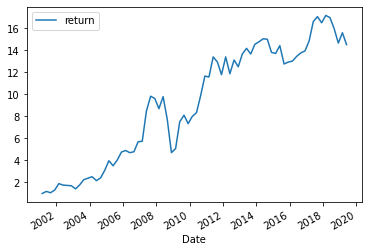

In [31]:
%matplotlib inline
cumreturn_quarterly.plot() # 차트 그리기

In [40]:
k200_p = pd.read_excel('K200.xlsx', sheet_name='index_price', index_col = 0)
k200_p.columns = ['KOSPI200']

In [41]:
k200_p = k200_p.reindex(rebalancing_schedule)  # 리밸런싱 주기와 일치하는 시점의 데이터만으로 추려냄

In [42]:
cumreturn_k200 = (k200_p.pct_change().fillna(0)+1).cumprod() # KOSPI200 지수의 누적수익률 계산

In [43]:
results = pd.concat([cumreturn_quarterly, cumreturn_k200], axis = 1)  # 전략의 누적 수익률과 데이터 결합

<AxesSubplot:xlabel='Date'>

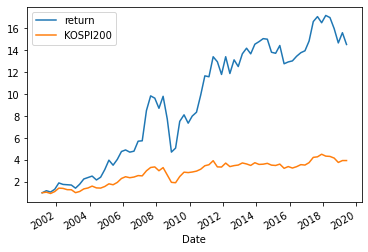

In [44]:
results.plot()